# Supervised Machine Learning -  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now let's get the data from the given url and convert it into dataframe using pandas.

In [6]:
Url = "http://bit.ly/w-data"
df = pd.read_csv(Url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Now we will plot some graphs to visualize & understand data better.

#### Bar Graph -  To see the scores of each student 

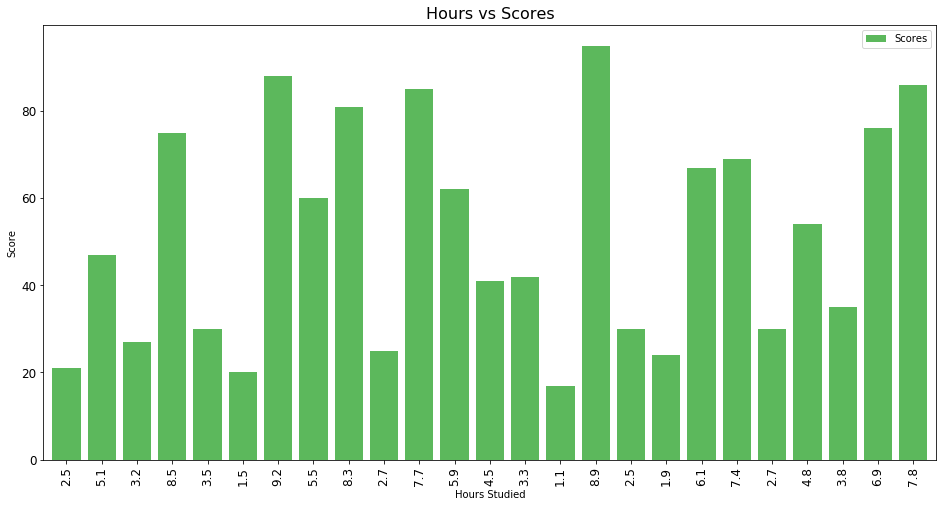

In [42]:
df.plot(x = 'Hours', y ='Scores', kind='bar', figsize=(16, 8),
            fontsize = 12 , width = 0.8,
            color = ['#5cb85c']) 
plt.ylabel('Score')
plt.xlabel('Hours Studied')
plt.title('Hours vs Scores', fontsize = 16)
plt.show()


#### Scatter Plot -

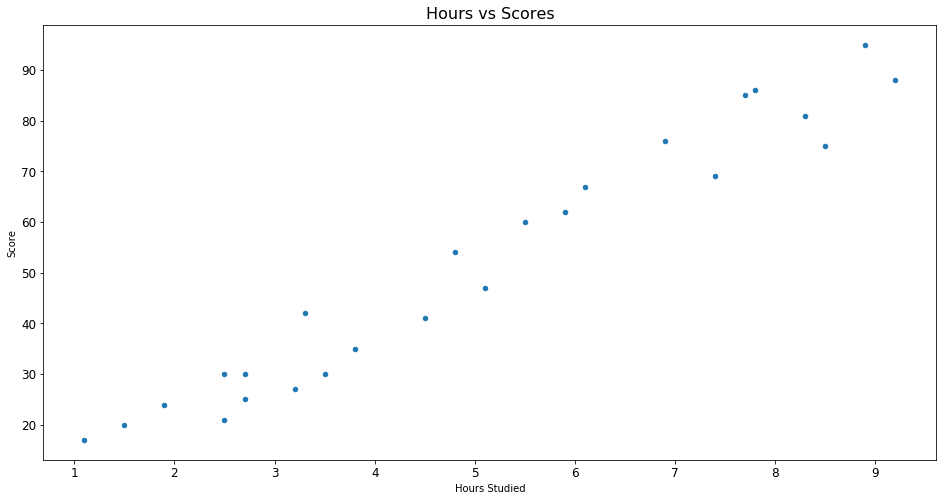

In [39]:
df.plot(x = 'Hours', y ='Scores', kind='scatter', figsize=(16, 8),
            fontsize = 12 ) 
plt.ylabel('Score')
plt.xlabel('Hours Studied')
plt.title('Hours vs Scores', fontsize = 16)
plt.show()

#### Hexabin -

Hexabin graph shows the frequency of occurance at point (x,y).

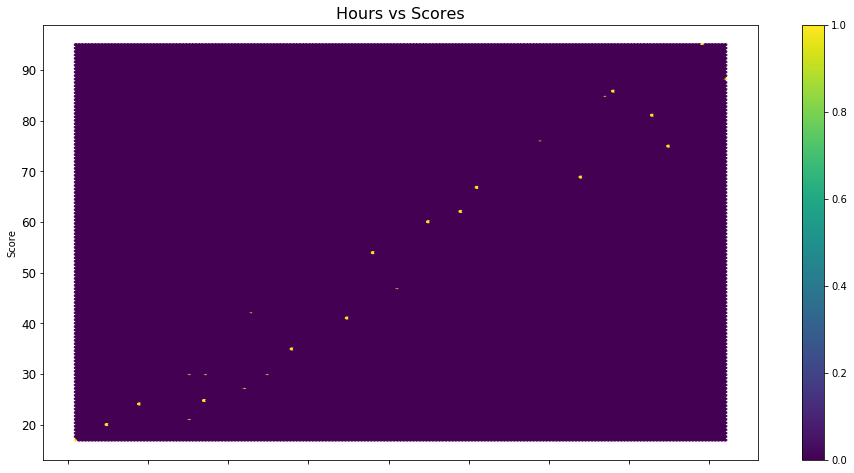

In [38]:
df.plot(x = 'Hours', y ='Scores', kind='hexbin', gridsize=200,
            fontsize = 12, figsize = (16, 8), cmap = 'viridis' ) 
plt.ylabel('Score')
plt.xlabel('Hours')
plt.title('Hours vs Scores', fontsize = 16)
plt.show()

In [52]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
coef = lr.coef_
intercept = lr.intercept_    

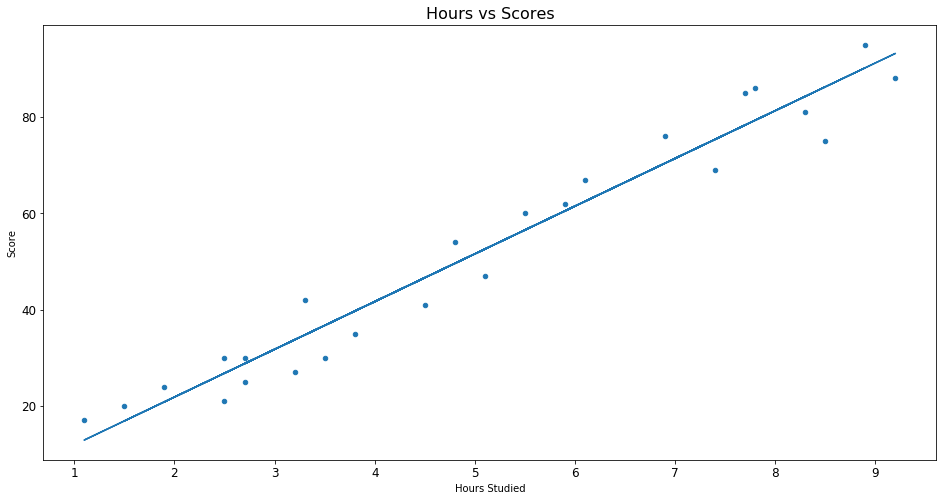

In [95]:
func = coef*x + intercept
df.plot(x = 'Hours', y ='Scores', kind='scatter', figsize=(16, 8),
            fontsize = 12 ) 
plt.ylabel('Score')
plt.xlabel('Hours Studied')
plt.title('Hours vs Scores', fontsize = 16)
plt.plot(x,func)
plt.show()

In [69]:
y_pred = lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [70]:
df1 = pd.DataFrame({'y-Actual': y_test, 'y-Predicted': y_pred})
df1.head()

,y-Actual,y-Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [78]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Square Error is: {}'.format(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error is: {}'.format(mean_absolute_error(y_test,y_pred)))

Mean Square Error is: 21.5987693072174
Mean Absolute Error is: 4.183859899002975


Q.) What will be the Score when student studied 9.25 hrs.

In [88]:
hrs = [[9.25]]
ans = lr.predict(hrs)
print('The Predicted Score for 9.25 hrs is: {:.3}'.format(ans[0]))

The Predicted Score for 9.25 hrs is: 93.7
